<a href="https://colab.research.google.com/github/Bharathkumar1404/LLM-Assignment/blob/main/22018647.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTALLING THE LIBRARIES**

In [230]:
#installing the transformer and datasets
!pip install transformers datasets
#installing the torch library
!pip install torch

**IMPORTING LIBRARIES**

In [231]:
#Importing all the requried libraries
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
import numpy as np
import evaluate
import seaborn as sns
from sklearn.metrics import classification_report

**USING THE PIPELINE FUNCTION**

In [232]:
# Use a pipeline as a high-level helper
#by using the pipe line we have done some model predictions
pipe = pipeline("text-classification", model="bert-base-uncased")
pipe("I need to go to college Asap but, I miss the bus")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_0', 'score': 0.5551221370697021}]

**IMPLEMENTING THE MODEL &
TOKENIZE BY AUTOTOKENIZER**

In [233]:
#using the tokinzer function to preprocess the dataset
#by implementing the model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**LOADING THE DATA**

In [234]:
#loadong the pretarined R8 dataset by using the loading library from transformers
R8_ds = load_dataset("dxgp/R8")

**TRAIN DATA**

In [235]:
#loading the train data from the datset
train_R8 = R8_ds["train"]
train_R8[0]

{'Unnamed: 0': 5162,
 'text': 'swedish prime minister s china visit boosts trade an big expansion in bilateral trade is expected as a result of swedish prime minister ingvar carlsson s visit to china a official of china s foreign economic relations and trade ministry official said he told the china daily that petroleum coal cotton non ferrous metals and electric engines could help balance the trade running at over three to one in sweden s favour total trade reached mln dlrs last year up pct on according to chinese statistics swedish sources said major paper mill projects and an aviation agreement would be discussed during carlsson s one week visit reuter',
 'label': 7}

In [236]:
#find the features of the data by using the function
train_R8.features

{'Unnamed: 0': Value(dtype='int64', id=None),
 'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None)}

**CONVERTING THE DATA TO PANDAS**

In [237]:
# Convert the dataset's train, test, or validation split to pandas DataFrame
train_R8 = R8_ds['train'].to_pandas()
test_R8 = R8_ds['test'].to_pandas()
val_R8 = R8_ds['validation'].to_pandas()

In [238]:
# Remove the 'Unnamed: 0' column
train_R8 = train_R8.drop(columns=['Unnamed: 0'])
test_R8 = test_R8.drop(columns=['Unnamed: 0'])
val_R8 = val_R8.drop(columns=['Unnamed: 0'])
#print the train data after converting to pandas
print(train_R8.head(10))


                                                text  label
0  swedish prime minister s china visit boosts tr...      7
1  gaf gaf seeks all of borg warner bor gaf corp ...      0
2  mcclain industries inc mccl st qtr dec net shr...      2
3  foothill group fgi sees better first quarter d...      2
4  tenneco tgt buys unisys uis unit tenneco inc s...      0
5  carling o keefe ckb sells oil unit takes gain ...      0
6  reuters to buy i p sharp of canada reuters hol...      0
7  wardair international ltd year net shr dlrs vs...      2
8  borg warner bor to sell unit for mln dlrs borg...      0
9  nvhomes nvh sets two for one split nvhomes lp ...      2


**EDA PLOTTING THE BAR CHART BY PLOTLY**

In [239]:
#defing a fun to plot bar and pie EDA analysis by the data
def plot_label_distribution(labels):
    """
    Creates and displays a bar chart and a pie chart for label distribution.

    Parameters:
    - labels: A dictionary where keys are label names and values are label counts.
    """
    x = list(labels.keys())  # Extract label names
    y = list(labels.values())  # Extract label counts

    # Create and display the bar chart
    fig = go.Figure(data=go.Bar(x=x, y=y))
    fig.update_layout(title='Label Distribution - Bar Chart', xaxis_title='Labels', yaxis_title='Label Count')
    fig.show()

    # Create and display the pie chart
    fig = go.Figure(data=[go.Pie(labels=x, values=y)])
    fig.update_layout(title='Label Distribution - Pie Chart')
    fig.show()


#using the function to plot the graphs
plot_label_distribution(labels)


In [240]:
# count the label class into dictionary by usin the replace function
labels = train_R8['label'].replace([0,1,2,3,4,5,6,7], ['acquistion', 'crude','earn','grain','interest','money-fx','ship','trade']).value_counts().to_dict()
print(train_R8)

                                                   text  label
0     swedish prime minister s china visit boosts tr...      7
1     gaf gaf seeks all of borg warner bor gaf corp ...      0
2     mcclain industries inc mccl st qtr dec net shr...      2
3     foothill group fgi sees better first quarter d...      2
4     tenneco tgt buys unisys uis unit tenneco inc s...      0
...                                                 ...    ...
4931  marcus mrcs votes pct stock dividend marcus co...      2
4932  protocomdevices prcm sees more profit erosion ...      2
4933  franklin minnesota insured sets payout mthly d...      2
4934  varity vat expects th qtr full year loss varit...      2
4935  n z trade surplus mln dlrs in february prelimi...      7

[4936 rows x 2 columns]


**PLOTTING WORD CLOUD**

In [241]:
#defing the function to plot the word cloud for the datset
def generate_word_cloud(text, max_words=100, background_color="white", colormap="viridis"):
    """
    Generate and display a word cloud.

    Parameters:
    - text: str, the input text from which to generate the word cloud.
    - max_words: int, maximum number of words to include in the word cloud.
    - background_color: str, background color for the word cloud image.
    - colormap: str, the color map to use for the word cloud.

    Returns:
    - Displays the word cloud.
    """
    # Create the word cloud object
    wordcloud = WordCloud(width=800, height=400,
                          max_words=max_words,
                          background_color=background_color,
                          colormap=colormap).generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Turn off axis
    plt.show()



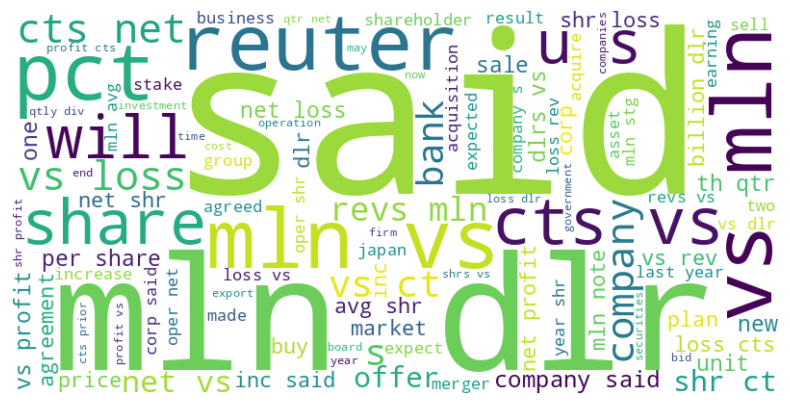

In [242]:
# using the defined function to get the word cloud plot for train data
generate_word_cloud(' '.join(train_R8['text']))

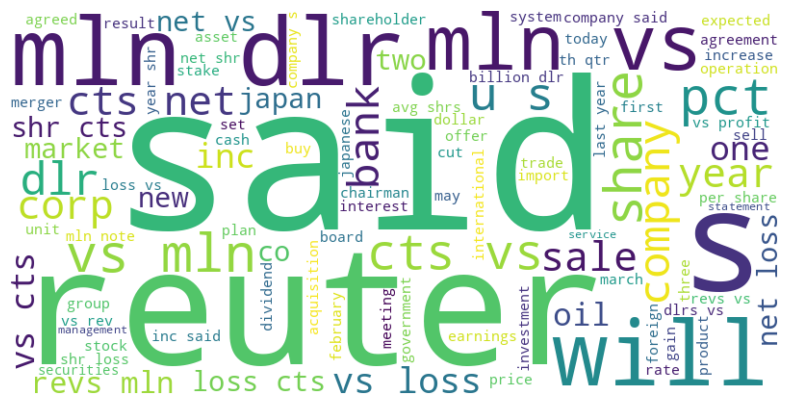

In [243]:
#plotting the word cloud for  val data
generate_word_cloud(' '.join(val_R8['text']))

**PREPROCESSING METHOD TOKKENIZING**

In [244]:
#tokenizing the function to tarin the model
#it is the preprocessing method for the datset
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(R8_ds["train"]["text"])


Token indices sequence length is longer than the specified maximum sequence length for this model (593 > 512). Running this sequence through the model will result in indexing errors


In [245]:
#giving the inputs to tokenize thetrain data
inputs = tokenizer("train_R8[0:5]")
inputs

{'input_ids': [101, 3345, 1035, 1054, 2620, 1031, 1014, 1024, 1019, 1033, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [246]:
#converting the tokkens into inputs ids
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

['[CLS]', 'train', '_', 'r', '##8', '[', '0', ':', '5', ']', '[SEP]']

In [247]:
#giving the tokkkenize arguments for the tokkenization
tokenized_dataset = tokenizer(
    R8_ds["train"]["text"],
    padding=True,
    truncation=True,
)

In [248]:
#function for the tokkenization example
def tokenize_function(example):
    return tokenizer(example["text"], truncation=True)

In [249]:
# getting the datset after the tokkenization process
tokenized_datasets = R8_ds.map(tokenize_function, batched=True)
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4936
    })
    validation: Dataset({
        features: ['Unnamed: 0', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 549
    })
    test: Dataset({
        features: ['Unnamed: 0', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2189
    })
})

** TRAING THE MODEL**

In [250]:
# give some tarining arguments for the training process
training_args = TrainingArguments("test-trainer")

In [251]:
#giving the model to tarin with squence classification and the no.of labels in the datset
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=8)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [252]:
# training the model for the evalution
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
)

In [253]:
#getting the evalution function the model
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

(549, 8) (549,)


In [254]:
#preds argiments for the evalutions
preds = np.argmax(predictions.predictions, axis=-1)

In [255]:
#installing the evaluate library
!pip install evaluate

In [256]:
#import evaluate

#metric = evaluate.load("accuracy")
#metric.compute(predictions=preds, references=predictions.label_ids)

In [257]:
# defing a fun for the compute metrics of preds evalution
def compute_metrics(eval_preds):
    metric = evaluate.load("accuracy")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [258]:
# final taring process of the model to get the acuraccy with help of arguments
training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch")
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=8,ignore_mismatched_sizes=True)

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**EVALUATING THE MODEL PREDICTIONS**

In [259]:
#train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.276400,0.152767,0.972678
2,0.098100,0.125430,0.969035
3,0.036100,0.142069,0.970856


TrainOutput(global_step=1851, training_loss=0.11609730084221921, metrics={'train_runtime': 447.6425, 'train_samples_per_second': 33.08, 'train_steps_per_second': 4.135, 'total_flos': 2459801540626176.0, 'train_loss': 0.11609730084221921, 'epoch': 3.0})

In [260]:
#predicting the tokkenized data
pred = trainer.predict(tokenized_datasets['test'])
true = tokenized_datasets['test']['label']

In [261]:
#arguments foer the predictions
pred = pred.predictions.argmax(axis=-1)

In [262]:
#implementing the confusion matrix
confusion_matrix(true, pred)

array([[ 681,    3,   11,    0,    0,    1,    0,    0],
       [   1,  120,    0,    0,    0,    0,    0,    0],
       [   5,    0, 1077,    0,    1,    0,    0,    0],
       [   0,    0,    0,    9,    1,    0,    0,    0],
       [   0,    0,    1,    0,   71,    7,    0,    2],
       [   1,    0,    1,    0,    5,   75,    0,    5],
       [   0,    3,    0,    0,    0,    0,   33,    0],
       [   0,    0,    0,    0,    0,    0,    1,   74]])

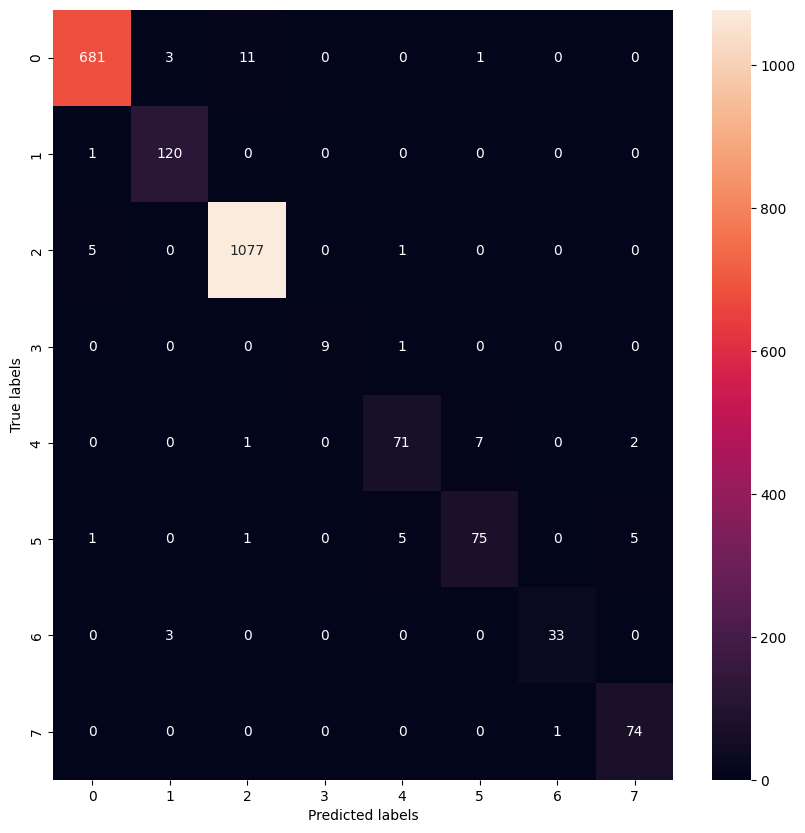

In [263]:
#plotting a confusion matrix from the accuracy and all model prediction values
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(true, pred), annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [264]:
#printing the accuracy and f1 score and support of the data
print(classification_report(true, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       696
           1       0.95      0.99      0.97       121
           2       0.99      0.99      0.99      1083
           3       1.00      0.90      0.95        10
           4       0.91      0.88      0.89        81
           5       0.90      0.86      0.88        87
           6       0.97      0.92      0.94        36
           7       0.91      0.99      0.95        75

    accuracy                           0.98      2189
   macro avg       0.95      0.94      0.95      2189
weighted avg       0.98      0.98      0.98      2189



In [265]:
# tokkenization for the test to presdiction some examples
tokenized_datasets['test']
test = tokenize_function(tokenized_datasets['test'])
tokenized_datasets['test'].features

{'Unnamed: 0': Value(dtype='int64', id=None),
 'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

**EXAMPLE PREDICTIONS**

In [266]:
# Select a few examples to display
num_examples = 5  # Number of examples to print
for i in range(num_examples):
    # Decode the input IDs to text
    input_ids = tokenized_datasets['test']['input_ids'][i]
    original_text = tokenizer.decode(input_ids, skip_special_tokens=True)

    # Get the true and predicted labels
    true_label = true[i]
    predicted_label = pred[i]

    # Print the example
    print(f"Example {i+1}:")
    print(f"Original Text: {original_text}")
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label}")
    print("-" * 50)

Example 1:
Original Text: asian exporters fear damage from u s japan rift mounting trade friction between the u s and japan has raised fears among many of asia s exporting nations that the row could inflict far reaching economic damage businessmen and officials said they told reuter correspondents in asian capitals a u s move against japan might boost protectionist sentiment in the u s and lead to curbs on american imports of their products but some exporters said that while the conflict would hurt them in the long run in the short term tokyo s loss might be their gain the u s has said it will impose mln dlrs of tariffs on imports of japanese electronics goods on april in retaliation for japan s alleged failure to stick to a pact not to sell semiconductors on world markets at below cost unofficial japanese estimates put the impact of the tariffs at billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of products hit by the new taxes we wouldn t 